[-3.74922, 40.463667]


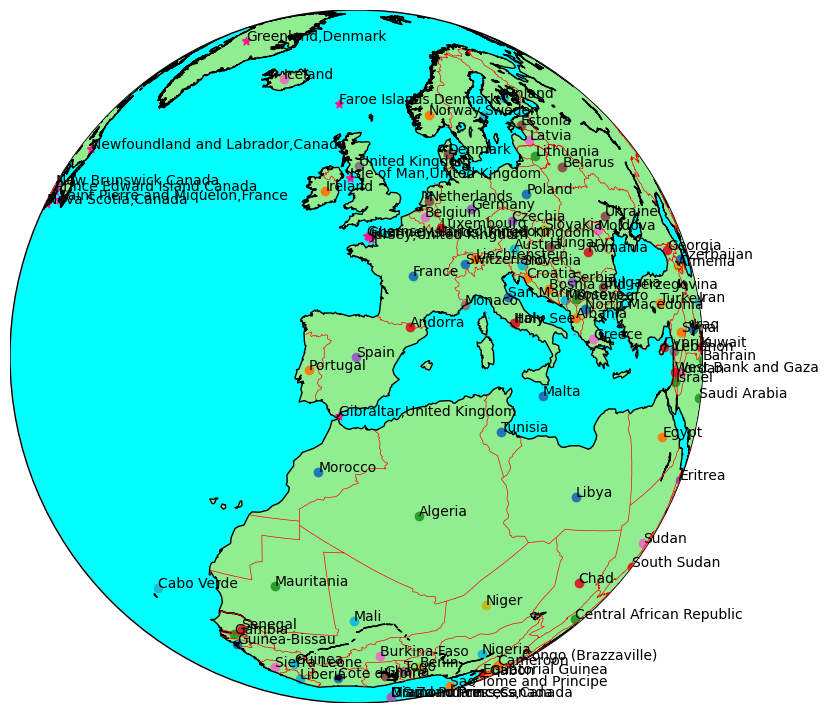

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import csv
import json
fig = plt.figure(figsize=(12,9))
# m = Basemap(projection='mill',
#            llcrnrlat = -90,
#            urcrnrlat = 90,
#            llcrnrlon = -180,
#            urcrnrlon = 180,
#            resolution = 'l')
pais = input('Que país quiere que esté centrado:\n--->')
coords = []
with open('C:/Users/sergi/Documents/Python/covid_charts/datos/paises.json',mode='r',encoding='utf8') as f:
    # if json.load(f)[pais][0] == '':
        coords = json.load(f)[pais]
        print(coords)
m = Basemap(projection='nsper',lon_0=coords[0],lat_0=coords[1],satellite_height=3000*1000,resolution='l')
m.drawcoastlines()
m.drawcountries(color='red')
m.drawcounties(color='orange')

m.drawmapboundary(color='pink', linewidth=1, fill_color='aqua')
m.fillcontinents(color='lightgreen', lake_color='aqua')


with open('C:/Users/sergi/Documents/Python/covid_charts/datos/confirmed.csv',mode='r',encoding='utf8') as f:
    reader = csv.reader(f)
    next(reader)
    for i in reader:
        if len(i[0]) !=0 and i[2] != '':
            m.scatter(float(i[3]),float(i[2]),latlon=True,marker='*',c='deeppink')
            plt.annotate(f'{i[0]},{i[1]}',m(float(i[3]),float(i[2])))
        elif i[2] != '':
            m.scatter(float(i[3]),float(i[2]),latlon=True)
            plt.annotate(i[1],m(float(i[3]),float(i[2])))
plt.show()